# Introduction in StatsModels Time Series Module Workshop

## Data import 

<font size=4  face = 'Georgia' style='Line-height : 2em'>    

The python framework `statsmodels` is the one of most popular reseachers tool for many statistical analysis issues.<br>
The one of the moist interesting module of this library is the `statsmodels.tsa`, which description you can find here https://www.statsmodels.org/stable/tsa.html


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
# Use seaborn style defaults and set the default figure size
sns.set(rc={'font.size': 15})
%matplotlib inline

In [2]:
try:
    import statsmodels.api as sm
except:
    !pip install statsmodels
finally:     
    import statsmodels.api as sm
    import statsmodels

<font size=4  face = 'Georgia' style='Line-height : 2em'>    
    
In this workshop we will work with the following dataset

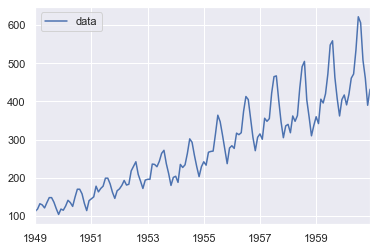

In [3]:
airpass = sm.datasets.get_rdataset("AirPassengers", "datasets")

airpass = pd.DataFrame(airpass.data["value"])

airpass.index = pd.date_range(start = "1949-01", periods = len(airpass.index), freq = "M").to_period()

airpass.index = airpass.index.to_timestamp()

airpass=airpass.rename(columns={"value": "data"}, inplace = False)

airpass.plot();



## Introduction in StatsModels

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
For time series visualization using StatsModels 
<br>we will use   `sm.graphics` module. <br>
For the first let's analyze  the Autocorrelation Function (**ACF**). ACF - is the degree of a time series to be linearity related to a lagged (delayed) version of itself. 
$$cor(k) = \frac{1}{N}\frac{\sum_{i=0}^{N-1}(y_k - ev)(y_{i-k} - ev)}{var(y
)} $$
Below we are taken     first 20 lags (starting from 1-rst ($k=1$))
<!--     http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2019/03/03_TrendSeasonTS_Python_updated.html -->

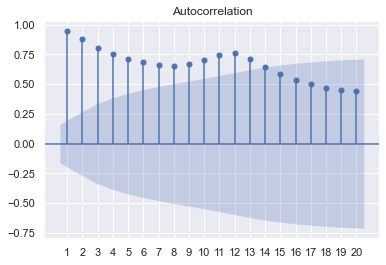

In [4]:
#Plot the ACF:
lags = 20
sm.graphics.tsa.plot_acf(airpass, 
                         lags = lags, 
                         zero = False)
plt.xticks(np.arange(1,  lags + 1, 1.0));
plt.show()

<font size=4  face = 'Georgia' style='Line-height : 2em'> 

Beside full correlation of the time series SM allow to estimate its **Partial correlation function (PACF)**.<br>
The "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2.<br>
Here X1 X2 and X3 can be lagged versions of Y.<br>
$$PACF(k,p) =
\frac
{\sum_{i=0}^{N-1}{(y_k - \hat{y}_{k|k-p+1})\cdot (y_{i-k}-\hat y_{i-k|i-k-p+1})}}
{std(y_k - \hat{y}_{k|k-p+1})\cdot std (y_{i-k}-\hat y_{i-k|i-k-p+1})} =
\frac{PACVF(k,p)}{std(y_k - \hat{y}_{k|k-p+1})\cdot std (y_{i-k}-\hat y_{i-k|i-k-p+1})};
$$
where <br>
$\hat{y}_{k|k-p+1}$ is the $\hat{y}_{k}$ predicted by $y_{k-1},...,y_{k-p+1}$ samples; <br>
$\hat y_{i-k|i-k-p+1}$ is the $\hat{y}_{i-k}$ predicted by $y_{i-k-1},...,y_{i-k-p+1}$ samples; <br>
$PACVF(k,p)$ is partial auto-covariance,    $PACVF(k,p)={\sum_{i=0}^{N-1}{(y_k - \hat{y}_{k|k-p+1})\cdot (y_{i-k}-\hat y_{i-k|i-k-p+1})}}/N$ 

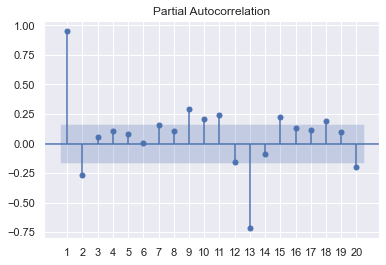

In [5]:
lags = 20
sm.graphics.tsa.plot_pacf(airpass, 
                          lags = lags, 
                          zero = False)
plt.xticks(np.arange(1,  lags + 1, 1.0))
plt.show()

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
For graphically distribution checking It is also can be build Q–Q (quantile-quantile) plot and histogram plot (from seaborn).<br>

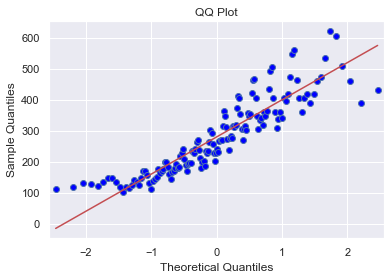

In [6]:
#Plot the QQ plot of the data:
sm.qqplot(airpass, 
          line='s') 
plt.title("QQ Plot")
plt.show()

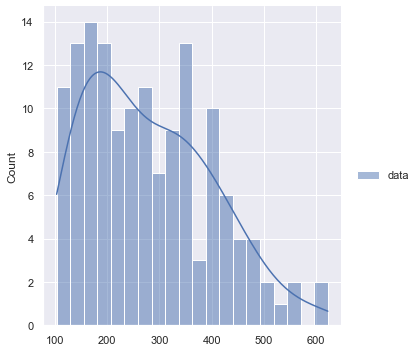

In [7]:
sns.displot(airpass,bins=20,kde=True);

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
Let's also check the data on the Ljung-Box test (normal distribution hypothesis).

<!-- http://web.vu.lt/mif/a.buteikis/wp-content/uploads/2019/03/03_TrendSeasonTS_Python_updated.html-->

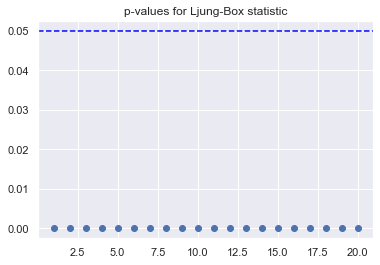

In [8]:
lags = 20

#The Ljung-Box test results for the first k lags:
tmp_acor = sm.stats.diagnostic.acorr_ljungbox(airpass, lags = lags, boxpierce = True, return_df = False)

# get the p-values
p_vals = pd.Series(tmp_acor[1])

#Start the index from 1 instead of 0 (because Ljung-Box test is for lag values from 1 to k)
p_vals.index += 1
fig = plt.figure()

#Plot the p-values:
p_vals.plot(linestyle='', 
            marker='o', 
            title = "p-values for Ljung-Box statistic", 
            legend = False)

#Add the horizontal 0.05 critical value line
plt.axhline(y = 0.05, color = 'blue', linestyle='--')
plt.show()

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
We can also check the stationary of data using Augmented Dickey–Fuller test (ADF) `statmodels.tsa.stattools.adfuller`.

In [9]:
dftest = sm.tsa.stattools.adfuller(airpass.data, autolag='AIC')

print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")

for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

Test statistic = 0.815
P-value = 0.992
Critical values :
	1%: -3.4816817173418295 - The data is not stationary with 99% confidence
	5%: -2.8840418343195267 - The data is not stationary with 95% confidence
	10%: -2.578770059171598 - The data is not stationary with 90% confidence


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Exercise 1**<br>
1. create White Gaussian Noises series and make previously showed analysis with it.

## Trend-Season-Residual decomposition with StatsModels

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
We can also try do te-trend data, for this the built-in routine `statmodels.tsa.tsatools.detrend`. <br>
On the practice we will use three different methods, and compare its results.

In [10]:
airpass[['de_trend_1']] = (airpass[['data']] - airpass[['data']].rolling(window=12).mean()) / airpass[['data']].rolling(window=12).std()

airpass[['de_trend_2']] = airpass[['data']].diff(1)

airpass[['de_trend_3']] =sm.tsa.tsatools.detrend(airpass[['data']], order=1)


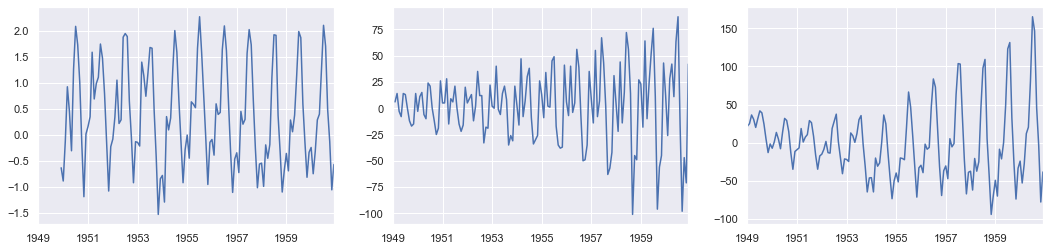

In [11]:
plt.figure(figsize = (18,4))

plt.subplot(131)
airpass.de_trend_1.plot();
plt.subplot(132)
airpass.de_trend_2.plot();
plt.subplot(133)
airpass.de_trend_3.plot();

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
Note for make data stationary  we can also remove seasonal part, <br>
The most simple way is to remove seasonal difference from detrended series.

,data,de_trend_1,de_trend_2,de_trend_3,de_season
1949-01-01,112,NaN,NaN,21.690038,NaN
1949-02-01,118,NaN,6.0,25.032854,NaN
1949-03-01,132,NaN,14.0,36.375670,NaN


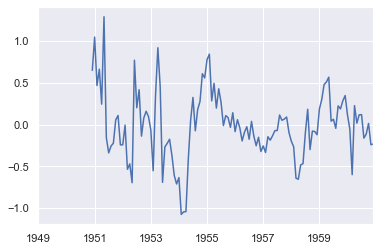

In [12]:
airpass[['de_season']] = airpass.de_trend_1.diff(12)
airpass.de_season.plot();
airpass.head(3)

In [13]:
print('airpass.de_trend_1')

dftest = sm.tsa.stattools.adfuller(airpass.de_trend_1.dropna(), autolag='AIC')

print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")

for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
    
    
print('airpass.de_season')

dftest = sm.tsa.stattools.adfuller(airpass.de_season.dropna(), autolag='AIC')

print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")

for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    
        

airpass.de_trend_1
Test statistic = -2.481
P-value = 0.120
Critical values :
	1%: -3.4865346059036564 - The data is not stationary with 99% confidence
	5%: -2.8861509858476264 - The data is not stationary with 95% confidence
	10%: -2.579896092790057 - The data is not stationary with 90% confidence
airpass.de_season
Test statistic = -3.181
P-value = 0.021
Critical values :
	1%: -3.4924012594942333 - The data is not stationary with 99% confidence
	5%: -2.8886968193364835 - The data is  stationary with 95% confidence
	10%: -2.5812552709190673 - The data is  stationary with 90% confidence


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Exercise 2**<br>
1. Check the stationary for `de_trend_2` and `de_trend_3` with and without season part.
2. Analyze with previously showed graphical analysis `de_season` component.
3. Represent series decomposition (trend, seasonal, residual) using previously showed method (use $trend = y(t)-seasonal-residual$ and season in the same manner).     

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

There are exist a lot of methods for Time Series Decomposition. <br>
We will start from the `statsmodels.tsa.seasonal_decompose` to automatically decompose the series.<br>
The method implement one- or tow-side simple moving average trend decomposition and then try to find such component, that $\widetilde{S}_t = \widetilde{S}_{t+period}$, where $\widetilde{S}$ is the series without estimated tend.

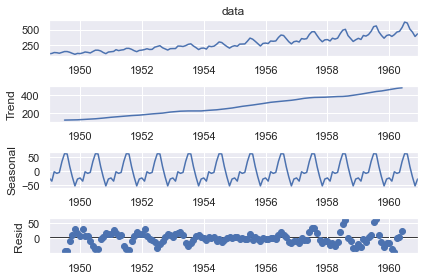

In [14]:
result = sm.tsa.seasonal_decompose(airpass.data, model='additive', period = 12, two_sided = True)

result.plot()

plt.show()

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
We can also plot the decomposition results together.

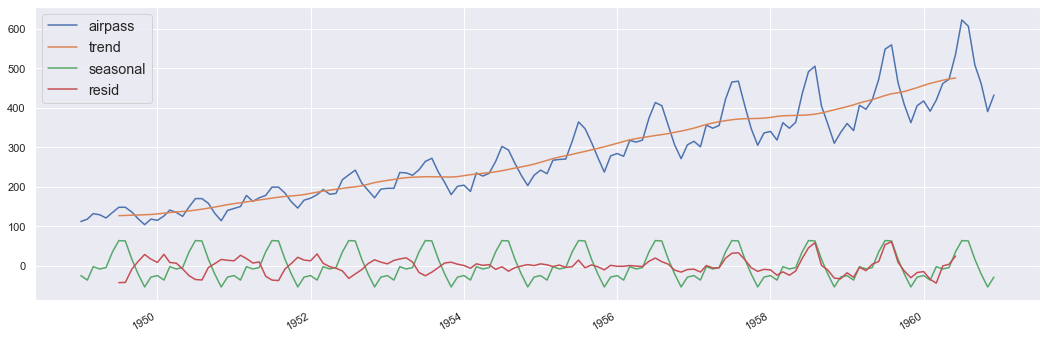

In [15]:
plt.figure(figsize=(18,6))

plt.plot(airpass.data, label="airpass")

result.trend.plot(label="trend")

result.seasonal.plot(label="seasonal")

result.resid.plot(label="resid")

plt.legend(fontsize ='x-large')
plt.show()

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
Let's analyze residuals of our decomposition    

Test RMSE: 221.531
            resid
count  132.000000
mean    -0.751263
std     19.340535
min    -43.967172
25%    -11.248422
50%     -0.452020
75%      9.527146
max     61.051768


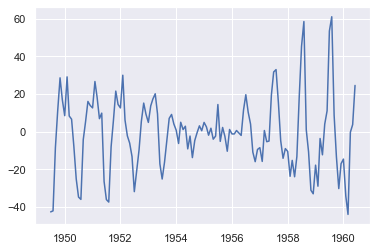

In [16]:
residuals =result.resid

rmse = np.sqrt(np.sum(np.power(residuals,2)))
               
print('Test RMSE: %.3f' % rmse)

residuals = pd.DataFrame(residuals)

print(residuals.describe())

plt.plot(residuals)

plt.show()

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
The other method for trend-seasonal component decomposition is based on the local polynomial regression, which is also known as LOESS (locally estimated scatterplot smoothing). <br>
The method is called **Seasonal-Trend decomposition using LOESS (STL)**.

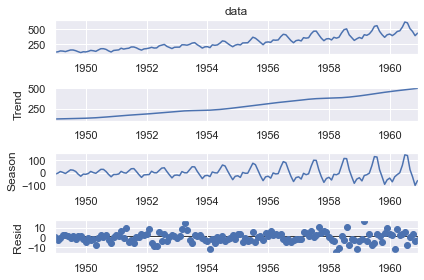

In [17]:
result_stl =sm.tsa.STL(airpass.data, period = 12,).fit()

fig = result_stl.plot()

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Exercise 3**<br>
1. Analyze with previously showed graphical and ADF analysis `residuals` component of  `statsmodels.tsa.seasonal_decompose` decomposition.  
2. Analyze with previously showed graphical and ADF analysis `residuals` component of  `statsmodels.tsa.STL` decomposition.      

## Time series forecast

### Naive forecast

<font size=4  face = 'Georgia' style='Line-height : 2em'> 

WE can make a simple (naive) one step  prediction <br>
Let's transform our dataset into a supervised learning problem, <br>
we can achieve this by creating a lag feature. <br>
In this transformed dataset, values at (t) are predictors (X) and values at (t+1) are the target variable (Y).

In [18]:
airpass[['label']] = airpass.data.shift(1)
airpass.head()

,data,de_trend_1,de_trend_2,de_trend_3,de_season,label
1949-01-01,112,NaN,NaN,21.690038,NaN,NaN
1949-02-01,118,NaN,6.0,25.032854,NaN,112.0
1949-03-01,132,NaN,14.0,36.375670,NaN,118.0
1949-04-01,129,NaN,-3.0,30.718487,NaN,132.0
1949-05-01,121,NaN,-8.0,20.061303,NaN,129.0


<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
Next, we can split the dataset into training and test subsets as below. 70% of the series created as training and 30% as a test subset.

In [22]:
x = airpass.data.values
y = airpass.label.values

train_size = int(len(x) * 0.7)

x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



<font size=4  face = 'Georgia' style='Line-height : 2em'> 

The naive prediction is the equation $y(t+1) = y(t)$

In [23]:
def naive_forecast(x_ts, n_predict):
    forecast = [x_ts[-1]]*n_predict
    return forecast

def forecast_residual(x_pred, x_ground_truth):
    residual = x_ground_truth-x_pred
    return residual


<font size=4  face = 'Georgia' style='Line-height : 2em'> 

we can evaluate our baseline model on the test dataset. 
<br>We walk through the test dataset (second column) time step by time step and get predictions.

Test RMSE: 327.744
                0
count   44.000000
mean    -1.909091
std     49.943139
min    -87.000000
25%    -42.250000
50%    -11.000000
75%     42.750000
max    101.000000


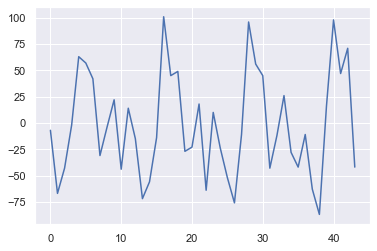

In [24]:
n_preidctions = x_test.size


predicted = naive_forecast(x_train,n_preidctions)

residuals = forecast_residual(x_test,y_test)        

rmse = np.sqrt(np.sum(np.power(residuals,2)))
               
print('Test RMSE: %.3f' % rmse)

residuals = pd.DataFrame(residuals)

print(residuals.describe())

plt.plot(residuals)

plt.show()

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
It will be also useful to  visualize data   

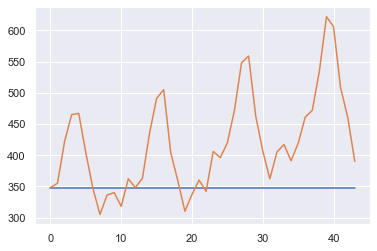

In [25]:
plt.plot(predicted)
plt.plot(y_test)

<font size=4  face = 'Georgia' style='Line-height : 2em'> 

As we can see above the residuals of our prediction are differs from normal distribution enough. <br>
Also summary statistics allowing suggest a positive bias in the model.

<font size=4  face = 'Georgia' style='Line-height : 2em'> 
    
Beside simple naive forecast it can be done seasonal-naive one, $$y(t)=y(t-t_s),$$ where $t_s$ is the s-lag of time series (s is season period).

In [26]:
def snaive_forecast(x_ts, season_period, n_predict):
    forecast = np.zeros(n_predict)
    
    for i in range (min(n_predict,season_period)):
        forecast[i] = x_ts[-season_period+i]
        
    if n_predict>season_period:      
        for i in range (n_predict-season_period):            
            forecast[i+season_period] = forecast[i]
        
    return forecast

First we can test the function

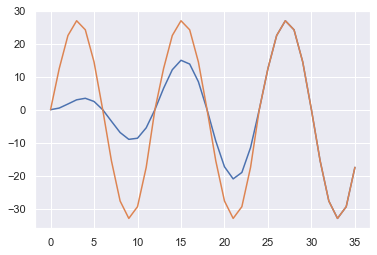

In [27]:
x =np.arange(36)* np.sin(2*np.pi*np.arange(36)/12)
plt.plot(x)
x_also = snaive_forecast(x, season_period=12, n_predict=36)
plt.plot(x_also)

Test RMSE: 692.528
                0
count   44.000000
mean    79.340909
std     68.643990
min    -38.000000
25%     28.000000
50%     73.500000
75%    117.500000
max    251.000000


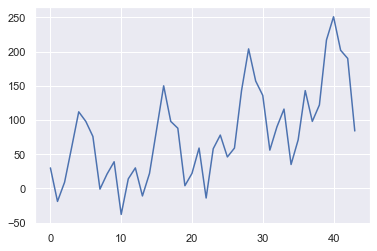

In [28]:
n_preidctions = x_test.size

season_period = 12

predicted = snaive_forecast(x_train,season_period,n_preidctions)

residuals = forecast_residual(predicted,y_test)        

rmse = np.sqrt(np.sum(np.power(residuals,2)))
               
print('Test RMSE: %.3f' % rmse)

residuals = pd.DataFrame(residuals)

print(residuals.describe())

plt.plot(residuals)

plt.show()

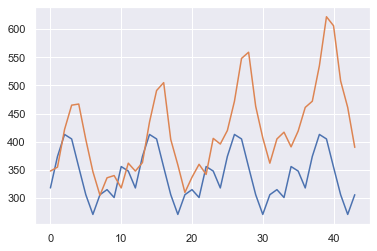

In [29]:
plt.plot(predicted)
plt.plot(y_test);

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

as we can see the prediction is slightly better.

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Exercise 4**<br>
1. Plot The prediction results and ground through one together.
2. Check the residuals of naive forecast with previously showed graphical analysis (ACF,PACF, Q-Q, Hist, Ljung-Box p-values).<br>
3. Implement moving average forecast, using $y(t) = \frac{1}{M}\sum_{i=0}^{M-1}y(t-i)$ and make it comparison with naive one.
 

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Exercise 5**<br>
1. Make forecast for some trend-season decomposition results (naive for trend and seasonal-naive for seasonal parts) .
2. Check the residuals of forecast analysis from part 1.2 (ACF,PACF, Q-Q, Hist, Ljung-Box p-values, ADF).<br>

### Smoothing forecast

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

Beside the simple moving average the exponential smoothing can be carried out.<br>




In [30]:
from statsmodels.tsa.holtwinters import (SimpleExpSmoothing, # SEMA                                         
                                         Holt,# DEMA
                                         ExponentialSmoothing) # TEMA
                     

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Single Exponential Smoothing** (or Single Exponential Moving Average, **SEMA**):<br>
$$\hat{y}_0 = y_0;$$
$$\hat{y}_n = \alpha y_n + (1-\alpha)\hat{y}_{n-1},$$
where $\alpha$ is the smoothing parameter; $\hat{y}$ is forecast value.<br>

c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


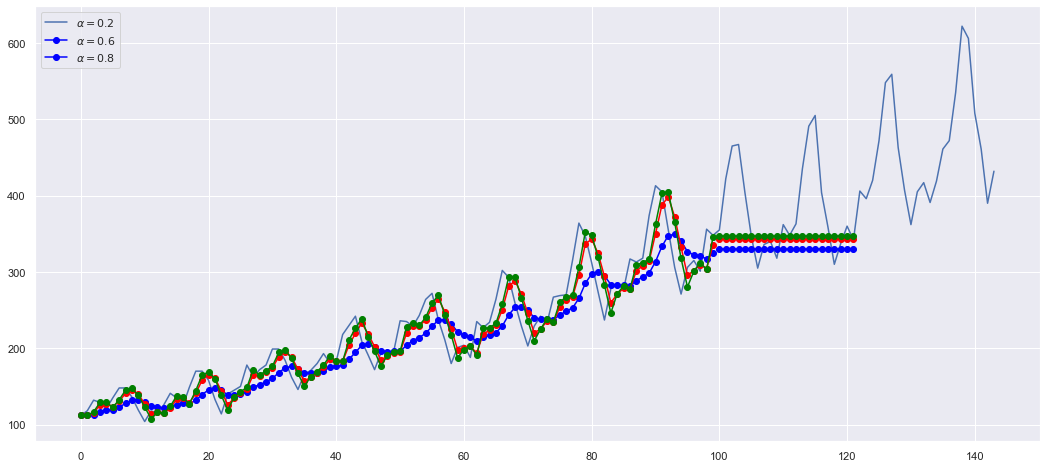

In [31]:
n_predict = x_test.size//2

x_train = pd.DataFrame(x_train)
plt.figure(figsize=(18,8))

plt.plot(airpass.data.values, label='groud')

# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(x_train).fit(smoothing_level=0.2,optimized=False)

fcast1 = fit1.forecast(n_predict).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(x_train).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(n_predict).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(x_train).fit(smoothing_level=0.8,optimized=False)
fcast3 = fit3.forecast(n_predict).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Double Exponential Smoothing** (or Double Exponential Moving Average, **DEMA**):<br>
$$b_0 = y_1-y_0;\to trend\\
l_0 = y_0;\to level$$

$$
l_n = \alpha y_n + (1-\alpha)(l_{n-1}+b_{n-1});\\
b_n = \beta (l_n-l_{n-1}) + (1-\beta)b_{n-1};\\
\hat{y}_{n+1} = l_n + b_n$$

where $\beta$ is the additional smoothing parameter.<br>

c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


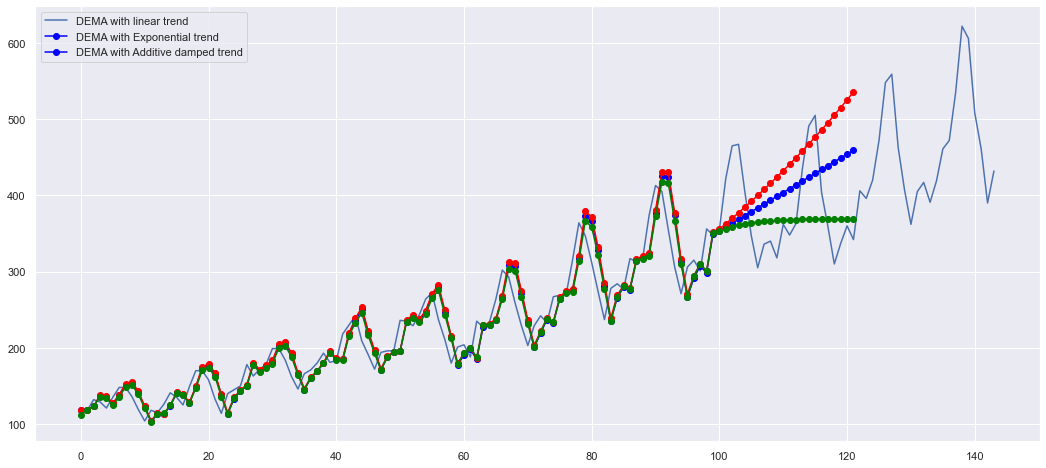

In [50]:
n_predict = x_test.size//2

x_train = pd.DataFrame(x_train)
plt.figure(figsize=(18,8))

plt.plot(airpass.data.values, label='groud')


fit1 = Holt(x_train).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(n_predict).rename("DEMA with linear trend")

fit2 = Holt(x_train, exponential=True).fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(n_predict).rename("DEMA with Exponential trend")

fit3 = Holt(x_train, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(n_predict).rename("DEMA with Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)

fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)

fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

<font size=4.5pt  face = 'georgia' style='Line-height :2'>

**Triple Exponential Smoothing** (or Triple Exponential Moving Average, **TEMA**, **Holt-Winters exponential smoothing, HW**):

$$
b_0 = y_1-y_0;\to trend\\
l_0 = y_0;\to level\\
s_0 = \sum_{i=0}^{L-1}(y_{L+i}-y_i)/L^2;\to seasonality\\
l_n = \alpha (y_n-s_{n-L} + (1-\alpha)(l_{n-1}+b_{n-1});\\
b_n = \beta (l_n-l_{n-1}) + (1-\beta)b_{n-1};\\
s_n = \gamma (y_n-l_n) + (1-\gamma)s_{n-L};\\
\hat{y}_{n+m} = l_n + m b_n + s_{n-L+1+(m-1)mod{L}}$$

where 
$\gamma$ is the triple smoothing parameter; 
$L$ is the estimation of season length (in samples); 
$m$ is where $ m$ can be any integer meaning we can forecast any number of points into the future. <br>
The index $n-L+1+(m-1)mod{L}$ in the forecast equation for TEMA is the offset into the seasonal components from the last full season from observed data (
i.e. if we are forecasting the 3rd point into the 45 season into the future, we cannot use seasonal components from the 44th season in the future since that season is also forecasted - we can use only the points form the observed data).

For TEMA an addition equations for estimation of deviation values can be add
$$
\hat y_{max_x}=l_{n−1}+b_{n−1}+s_{n−L}+md_{k−L},\\
\hat y_{min_x}=l_{n−1}+b_{n−1}+s_{n−L}-md_{k−L},\\
d_k=\gamma∣y_k−\hat y_k∣+(1−\gamma)d_{k−L},$$
where $d$ is expected deviation.

c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
c:\users\ronkin\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1116: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  FutureWarning,


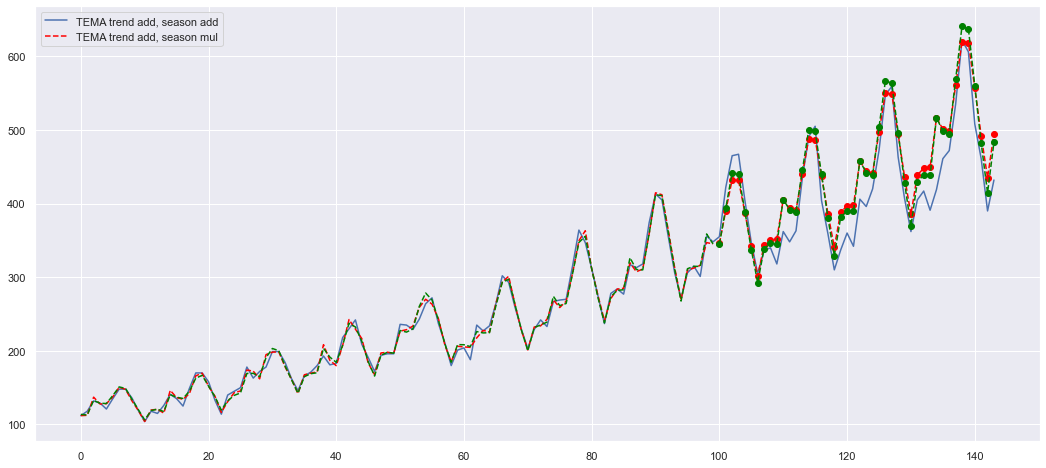

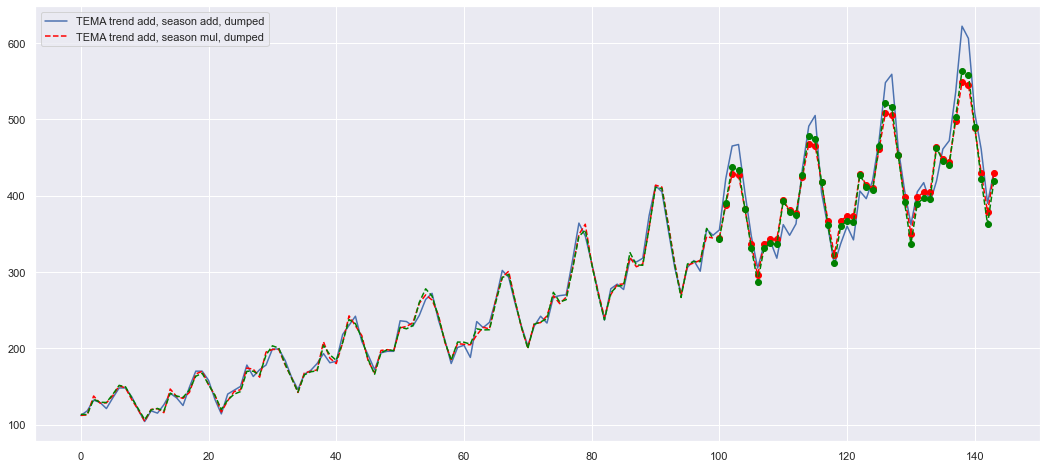

In [52]:
n_predict = x_test.size

x_train = pd.DataFrame(x_train)


fit1 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)

fit3 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add', seasonal='add', damped_trend=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(x_train, seasonal_periods=12, trend='add', seasonal='mul', damped_trend=True).fit(use_boxcox=True)

plt.figure(figsize=(18,8))

plt.plot(airpass.data.values, label='groud')

fit1.fittedvalues.plot(style='--', color='red' )
fit2.fittedvalues.plot(style='--', color='green', label='trend add, season mul')

fit1.forecast(n_predict).rename("TEMA trend add, season add").plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(n_predict).rename("TEMA trend add, season mul").plot(style='--', marker='o', color='green', legend=True)

plt.show()

plt.figure(figsize=(18,8))

plt.plot(airpass.data.values, label='groud')

fit3.fittedvalues.plot(style='--', color='red')
fit4.fittedvalues.plot(style='--', color='green')

fit3.forecast(n_predict).rename("TEMA trend add, season add, dumped").plot(style='--', marker='o', color='red', legend=True)
fit4.forecast(n_predict).rename("TEMA trend add, season mul, dumped").plot(style='--', marker='o', color='green', legend=True)

plt.show()


<font size=4.5pt  face = 'georgia' style='Line-height :2'>
    
**Exercise 6**<br>
1. Analyze any kind of studied SEMA, DEMA and TEMA prediction residuals like in previous exercise.
